<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL Security Data Analytics and Visualisation
## Portfolio Assignment: Part 2
### Academic year: 2024-25
## Conduct a security investigation to examine and classify different malware characteristics
---

For this task, the company **UWEtech** have enlisted your support as a security data analyst once again. They believe they have found malware on some of their workstations; however they do not know what malware it is. They also believe that some machines may be infected with different kinds of malware. They have asked you to identify what malware is running on each of the contaminated machines, so that they may understand more about how this incident has occurred on their corporate network.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav-2024

**This exercise carries a weight of 30% towards your overall portfolio submission**

### Submission Documents
---

For Part 2 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART2.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 15th MAY @ 14:00**. 


In [18]:
!pip install numpy pandas matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features = pd.read_csv('./part2/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [20]:
labels = pd.read_csv('./part2/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels.value_counts()

label     
bladabindi    2000
dealply       2000
emotet        2000
filetour      2000
flystudio     2000
gamarue       2000
gandcrab      2000
high          2000
razy          2000
startsurf     2000
upatre        2000
vittalia      2000
wannacry      2000
zbot          2000
Name: count, dtype: int64

In this dataset, we have collected data from 28000 systems (rows), where each system reports 256 parameters (columns).

We will first look at developing a small classifier "by hand", to help you understand how the classifier works, and then we will look at using the full dataset on more powerful classifiers to see whether we can classify the different malware varients on the set of workstations.

## Part 1: Developing a small classifier "by hand"

### Do not modify this cell

In [21]:
# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


We now have a smaller sample of data to work with called train_data, that has three malware families included, and we have reduced the number of features to make it easier to understand the process of how the classifier operates.

### Question 1: Find the Centroid point of each of the three groups
#### (2 marks)

*Hint: We have filtered the sample to a new variable called **train_data**. Also, think about how to find the mid-point of a set of co-ordinate points **x** and **y**.*

In [22]:
# ANSWER

wannacry_centroid = []
razy_centroid = []
startsurf_centroid = []

######### ADD YOUR CODE HERE ##########
wannacry_centroid = train_data[train_data['labels'] == 'wannacry'][['x', 'y']].mean().values
razy_centroid = train_data[train_data['labels'] == 'razy'][['x', 'y']].mean().values
startsurf_centroid = train_data[train_data['labels'] == 'startsurf'][['x', 'y']].mean().values

print ("Wannacry: ", wannacry_centroid)
print ("Razy: ", razy_centroid)
print ("Startsurf: ", startsurf_centroid)

Wannacry:  [2181660.66   11087.1 ]
Razy:  [100505.22   6158.28]
Startsurf:  [478778.12   3754.04]


### Question 2: Create a Scatter Plot that shows both the train data and the corresponding centroids. Colour-code your data by group, and use a different visual marker for the centroid.

#### (2 marks)

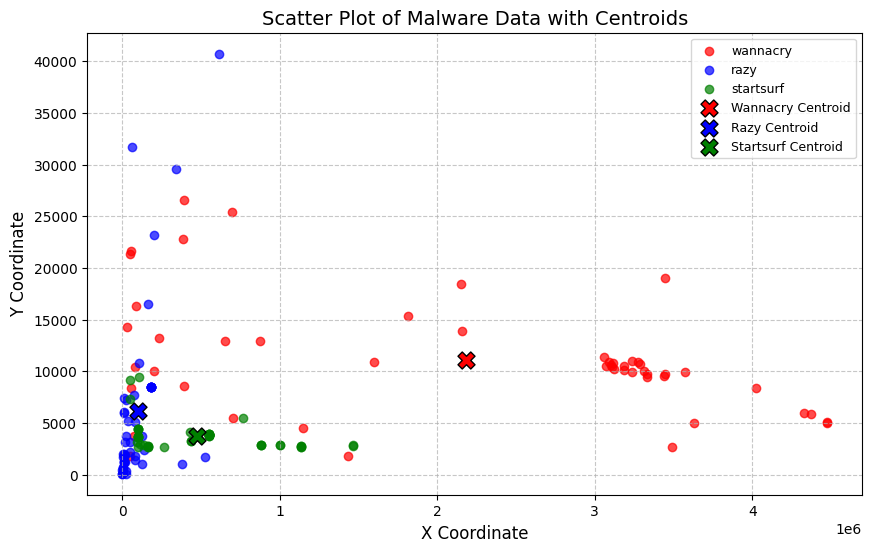

In [23]:
# ANSWER
######### ADD YOUR CODE HERE ##########
plt.figure(figsize=(10, 6))

for label, color in zip(['wannacry', 'razy', 'startsurf'], ['red', 'blue', 'green']):
    subset = train_data[train_data['labels'] == label]
    plt.scatter(subset['x'], subset['y'], label=label, color=color, alpha=0.7)

plt.scatter(wannacry_centroid[0], wannacry_centroid[1], color='red', marker='X', s=150, label='Wannacry Centroid', edgecolors='black')
plt.scatter(razy_centroid[0], razy_centroid[1], color='blue', marker='X', s=150, label='Razy Centroid', edgecolors='black')
plt.scatter(startsurf_centroid[0], startsurf_centroid[1], color='green', marker='X', s=150, label='Startsurf Centroid', edgecolors='black')

plt.title('Scatter Plot of Malware Data with Centroids', fontsize=14)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
plt.legend(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Question 3a: For each point in test_data, calculate the Euclidean distance between the point and each of the three centroid points 

#### (3 marks)

### Question 3b: Use the closest centroid to assign membership and compare against the test data label to obtain a score of successful classifications 

#### (3 marks)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task, and you will likely want to answer both questions within the same for loop below.*

In [24]:
# ANSWER
score = 0

for i in range(test_data.shape[0]):
    
    ######### Question 3a - ADD YOUR CODE HERE ##########
    test_point_x = test_data.iloc[i]['x']
    test_point_y = test_data.iloc[i]['y']
    
    distance1 = np.sqrt((test_point_x - wannacry_centroid[0])**2 + (test_point_y - wannacry_centroid[1])**2)
    distance2 = np.sqrt((test_point_x - razy_centroid[0])**2 + (test_point_y - razy_centroid[1])**2)
    distance3 = np.sqrt((test_point_x - startsurf_centroid[0])**2 + (test_point_y - startsurf_centroid[1])**2)

    distances = [distance1, distance2, distance3]
    dist_labels = ['wannacry', 'razy', 'startsurf']
    
    ######### Question 3b - ADD YOUR CODE HERE ##########
    min_distance_index = np.argmin(distances)
    
    predicted_label = dist_labels[min_distance_index]
    
    actual_label = test_data.iloc[i]['labels']
    
    if predicted_label == actual_label:
        score += 1
    
print("Score:", score)

Score: 63


### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier 

#### (1 marks)

In [25]:
#ANSWER

######### ADD YOUR CODE HERE ##########
accuracy = (score / test_data.shape[0]) * 100

print(f"Number of correct predictions: {score}")
print(f"Total number of test samples: {test_data.shape[0]}")
print(f"Accuracy: {accuracy:.2f}%")

if accuracy > 80:
    print("The classifier shows strong performance.")
elif accuracy > 60:
    print("The classifier shows moderate performance.")
else:
    print("The classifier shows weak performance.")

Number of correct predictions: 63
Total number of test samples: 90
Accuracy: 70.00%
The classifier shows moderate performance.


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification. You will want to consult the [scikit-learn documentation](https://scikit-learn.org/stable/index.html) to answer the following questions.

### Question 5: Scale the Features DataFrame using the StandardScaler function 

#### (1 mark)

*Hint: The variable **features** contains all of the numerical parameters that we will use to train our ML model, which we need to normalise using this function.*

In [26]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [27]:
# ANSWER
######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features)

print("Original features shape:", features.shape)
print("Scaled features shape:", scaled_features_df.shape)
print("First few rows of scaled features:")
print(scaled_features_df.head())

Original features shape: (28000, 256)
Scaled features shape: (28000, 256)
First few rows of scaled features:
        0         1         2         3         4         5         6    \
0 -0.097820  0.672159  0.826630  0.380661  0.647650  0.204495  0.792002   
1 -0.355085 -0.291567 -0.274569 -0.254820 -0.323318 -0.234858 -0.178266   
2 -0.351784  0.379844  0.241558  0.279985  0.178160  0.423038  0.259812   
3 -0.373671 -0.408634 -0.418818 -0.451310 -0.434547 -0.405185 -0.364900   
4 -0.375965 -0.363170 -0.384699 -0.382059 -0.402040 -0.327008 -0.317989   

        7         8         9    ...       246       247       248       249  \
0  0.691117  1.028243  0.432558  ...  0.191715  0.044177  0.845365 -0.010620   
1 -0.244002 -0.310024 -0.182924  ... -0.155188 -0.155994 -0.248598 -0.175093   
2  0.314504  0.202153  1.361289  ...  0.543863  0.536584  0.422895  0.475873   
3 -0.422724 -0.506936 -0.419373  ... -0.411219 -0.363332 -0.464176 -0.352293   
4 -0.328030 -0.433797 -0.295563  ... -0.

### Question 6: Use the LabelEncoder function on the Labels variable to obtain numerical label data 

#### (1 mark)

In [28]:
# ANSWER
######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(labels['label'])

print("Original labels and their encoded values:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

print("\nShape of encoded labels:", encoded_labels.shape)
print("First few encoded labels:")
print(encoded_labels[:10])

Original labels and their encoded values:
bladabindi -> 0
dealply -> 1
emotet -> 2
filetour -> 3
flystudio -> 4
gamarue -> 5
gandcrab -> 6
high -> 7
razy -> 8
startsurf -> 9
upatre -> 10
vittalia -> 11
wannacry -> 12
zbot -> 13

Shape of encoded labels: (28000,)
First few encoded labels:
[7 7 7 7 7 7 7 7 7 7]


### Question 7: Prepare the dataset for ML testing using the Train-Test-Split function
#### (1 mark)

In [32]:
# ANSWER
######### ADD YOUR CODE HERE ##########
from sklearn.model_selection import train_test_split

# Using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, 
    encoded_labels, 
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=encoded_labels  # Ensure proportional representation of classes
)

print(f"Total dataset size: {scaled_features.shape[0]} samples")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Total dataset size: 28000 samples
Training set size: 22400 samples
Testing set size: 5600 samples
Training set shape: (22400, 256)
Testing set shape: (5600, 256)


### Question 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [33]:
# ANSWER
######### ADD YOUR CODE HERE ##########
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

start_time = time.time()

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             
    solver='adam',                
    alpha=0.0001,                  
    batch_size='auto',            
    learning_rate='adaptive',      
    max_iter=200,                  
    random_state=42 
)              

mlp.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")
y_pred = mlp.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {mlp_accuracy:.4f} ({mlp_accuracy*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Training time: 15.79 seconds
MLP Accuracy: 0.8361 (83.61%)

Classification Report:
              precision    recall  f1-score   support

  bladabindi       0.78      0.78      0.78       400
     dealply       0.96      0.99      0.98       400
      emotet       0.97      0.98      0.97       400
    filetour       0.98      0.98      0.98       400
   flystudio       0.97      0.92      0.94       400
     gamarue       0.82      0.67      0.74       400
    gandcrab       0.92      0.96      0.94       400
        high       0.56      0.39      0.46       400
        razy       0.56      0.65      0.60       400
   startsurf       0.89      0.96      0.92       400
      upatre       0.75      0.88      0.81       400
    vittalia       0.90      0.86      0.88       400
    wannacry       0.97      0.97      0.97       400
        zbot       0.65      0.72      0.68       400

    accuracy                           0.84      5600
   macro avg       0.84      0.84      0.83      56

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Question 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [34]:
# ANSWER
######### ADD YOUR CODE HERE ##########
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

start_time = time.time()

rf = RandomForestClassifier(
    n_estimators=100,     # Number of trees in the forest
    max_depth=None,       
    min_samples_split=2,  
    criterion='gini',    
    bootstrap=True,      
    random_state=42       
)

rf.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training time: {training_time:.2f} seconds")

y_pred_rf = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("\nComparison with MLP classifier:")
print(f"MLP Accuracy: {mlp_accuracy:.4f} ({mlp_accuracy*100:.2f}%)")
print(f"Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

Training time: 17.34 seconds
Random Forest Accuracy: 0.8811 (88.11%)

Classification Report:
              precision    recall  f1-score   support

  bladabindi       0.83      0.82      0.82       400
     dealply       0.98      0.99      0.99       400
      emotet       0.99      0.99      0.99       400
    filetour       0.99      0.99      0.99       400
   flystudio       0.96      0.93      0.94       400
     gamarue       0.78      0.87      0.82       400
    gandcrab       0.94      0.96      0.95       400
        high       0.59      0.60      0.60       400
        razy       0.68      0.62      0.65       400
   startsurf       0.95      0.95      0.95       400
      upatre       0.94      0.90      0.92       400
    vittalia       0.95      0.93      0.94       400
    wannacry       0.96      0.98      0.97       400
        zbot       0.80      0.81      0.80       400

    accuracy                           0.88      5600
   macro avg       0.88      0.88      0.

### Question 10: Describe what you believe are the key findings of this task, comparing the *by-hand* classifier with the MLP classifier. As part of your discussion, consider the volume of data in both approaches and the issues of data separability. Give justifications for your answer. Limit your response to a maximum of 300 words.

#### (10 marks).

The two approaches differ significantly in terms of scalability and performance. While the by-hand classifier focuses on a small subset of data with only two features, the MLP classifier makes the most out of the dataset (thousands of samples) with all 256 features. However, it is a trade-off for the by-hand classifier to exchange for interpretability and inexpensive computations. The by-hand is also seen as a limitation to linear separable data and cannot handle high-dimensional datasets effectively.

In contrast, MLP possesses a multi-layer architecture which enables it to learn complex, non-linear decision boundaries, making it far more effective for real-world malware detection tasks. The MLP also achieved higher accuracy compared to the by-hand classifier, showcasing its ability to capture anomalies and strange patterns in the data. In return, it sacrifices interpretability for performance. Unlike the by-hand technique, where transparency is crystal clear in decision-making process, the MLP acts as a "black box", making it harder to explain the underlying predictions. However, it is common to face this situtaion in machine learning tasks, especially dealing with high-dimensional data.

Under the scope of security, the by-hand classifier plays as a fast respondent, useful for quickly getting insights but is insufficient for detecting complicated malware. The MLP seems to be complex but on the other hand, is better for larger scale tasks, high-dimensional datasets, making it a more practical option for modern security analytics.

To summarize, it is best for beginners to get started with the by-hand classifier to understand the concept of basic classification principles. After stacking more experience in the field, then choosing MLP for practical analytics is ideal to tackle bigger challenges. It is a consideration about task complexity, volume of data and the need for interpretability versus accuracy